<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),sep=';')  

Saving cardio_train.csv to cardio_train.csv


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore") 

%matplotlib inline
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


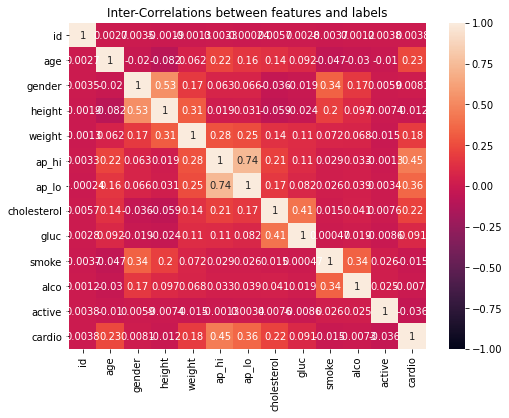

In [9]:
# Visualizing Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(method="spearman"), annot=True, vmax=1, vmin=-1)
plt.title("Inter-Correlations between features and labels")
plt.show()

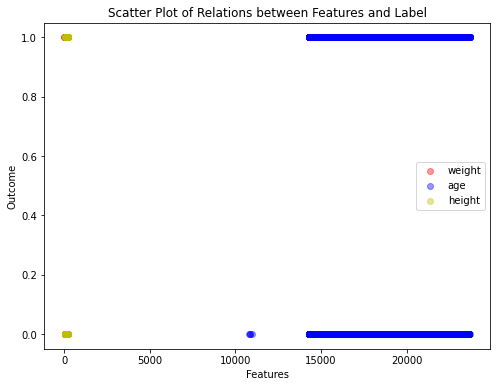

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['weight'], data['cardio'], c="r", alpha=0.4, label="weight")
plt.scatter(data['age'], data['cardio'], c="b", alpha=0.4, label="age")
plt.scatter(data['height'], data['cardio'], c="y", alpha=0.4, label="height")
plt.legend()
plt.title("Scatter Plot of Relations between Features and Label")
plt.xlabel("Features")
plt.ylabel("Outcome")
plt.show()

In [23]:
# Cleaning up
# data.drop('id', axis=1, inplace=True)
scaled_vals = StandardScaler().fit_transform(data.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_vals, columns=['age','gender',	'height','weight', 'ap_hi',	'ap_lo',	'cholesterol', 'gluc',	'smoke',	'alco',	'active'])
scaled_df['cardio'] = data.cardio
scaled_df

X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

In [26]:
# Building Model
est = RandomForestClassifier()
est.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
features = ['height','weight']
plot_partial_dependence(est, X, features, fig = fig)
fig.suptitle("Partial dependence on Fully Co-related Features", fontsize = 20)